<a href="https://colab.research.google.com/github/HarshiniR4/Fall-2023-NYU-AI-hr2547/blob/main/Midterm/midterm_take_home_PS1_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fine-Tuning and Feature Extraction 

Perform the fine-tunning and feature extraction methods of transfer learning using the same model as ResNEt-50, for the class `ship`.

Repeat the visualization before and after  transfer learning and write a conclusive summary as to the relative value of the two methods.

In [1]:
import numpy as np
import tensorflow as tf
from keras import layers, models
from keras import backend as K
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense
from keras.models import Model
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.applications.resnet import preprocess_input, decode_predictions, ResNet50
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from keras.models import load_model
file = load_model('/content/drive/MyDrive/cifar10_resnet50_func1 (2).h5')

## Load Data and Preprocess

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

170498071/170498071 [==============================] - 5s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [5]:
Y_train_all = y_train
Y_test_all = y_test

X_train_new = x_train.astype('float32') / 255.0
X_test_new = x_test.astype('float32') / 255.0

# X_train_new = X_train_all.astype('float32') / 255.0
# X_test_new = X_test_all.astype('float32') / 255.0

Y_train_new = tf.keras.utils.to_categorical(Y_train_all)
Y_test_new = tf.keras.utils.to_categorical(Y_test_all)

print(X_train_new.shape)
print(X_test_new.shape)
print(Y_train_new.shape)
print(Y_test_new.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


In [6]:
res50_model_all= models.load_model('/content/drive/MyDrive/cifar10_resnet50_all.h5')

In [7]:
ship_class = 8

In [8]:
# Create binary labels (1 for "ship" class and 0 for "not ship" class)
y_train_binary = (y_train == ship_class).astype(int)
y_test_binary = (y_test == ship_class).astype(int)

In [9]:
# Preprocess the data (e.g., normalize and scale)
x_train_new = x_train[y_train_binary[:, 0]]
x_test_new = x_test[y_train_binary[:,0]]

x_train_new = x_train.astype('float32') / 255.0
x_test_new = x_test.astype('float32') / 255.0

# Verify the binary labels (1 for "ship" and 0 for "not ship")
print("Original labels for the first 10 samples in y_train:", y_train[:10].flatten())
print("Binary labels for the first 10 samples in y_train:", y_train_binary[:10].flatten())

print(x_train.shape)
print(x_test.shape)
print(y_train_binary.shape)
print(y_test_binary.shape)

Original labels for the first 10 samples in y_train: [6 9 9 4 1 1 2 7 8 3]
Binary labels for the first 10 samples in y_train: [0 0 0 0 0 0 0 0 1 0]
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [11]:
# resnet_base_ship = ResNet50(include_top=False, weights='imagenet', input_shape=(32, 32, 3))
resnet_base_ship = res50_model_all
# print(resnet_base_ship.layers[-4])
# Create your custom top layers
x = GlobalAveragePooling2D()(resnet_base_ship.layers[-4].output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the binary classification model
res50_model = Model(inputs=resnet_base_ship.input, outputs=predictions)

# Freeze the layers of the pre-trained model
for layer in resnet_base_ship.layers:
    layer.trainable = False

# Compile the model
res50_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
res50_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [13]:
# Train the model
res50_model.fit(x_train_new, y_train_binary, epochs=200, batch_size=64, validation_data=(x_test_new, y_test_binary))

Epoch 1/200
782/782 [==============================] - 28s 19ms/step - loss: 0.1880 - accuracy: 0.9210 - val_loss: 0.2160 - val_accuracy: 0.9079
Epoch 2/200
782/782 [==============================] - 13s 16ms/step - loss: 0.1715 - accuracy: 0.9287 - val_loss: 0.2108 - val_accuracy: 0.9104
Epoch 3/200
782/782 [==============================] - 14s 17ms/step - loss: 0.1672 - accuracy: 0.9303 - val_loss: 0.2052 - val_accuracy: 0.9141
Epoch 4/200
782/782 [==============================] - 14s 18ms/step - loss: 0.1638 - accuracy: 0.9315 - val_loss: 0.2022 - val_accuracy: 0.9096
Epoch 5/200
782/782 [==============================] - 14s 18ms/step - loss: 0.1605 - accuracy: 0.9325 - val_loss: 0.2198 - val_accuracy: 0.9014
Epoch 6/200
782/782 [==============================] - 13s 17ms/step - loss: 0.1583 - accuracy: 0.9326 - val_loss: 0.2164 - val_accuracy: 0.9062
Epoch 7/200
782/782 [==============================] - 13s 17ms/step - loss: 0.1565 - accuracy: 0.9341 - val_loss: 0.2171 - val_ac

In [14]:
res50_model.save('/content/drive/MyDrive/cifar10_resnet50_transfer_learning1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
res50_model = models.load_model('/content/drive/MyDrive/cifar10_resnet50_transfer_learning.h5')

1/1 [==============================] - 3s 3s/step
Predicted Class: 0


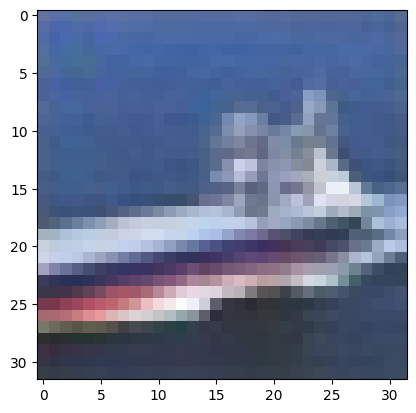

In [15]:
ship_indices = np.where(y_test_binary == 1)[0]
image_index = np.random.choice(ship_indices)
img = x_test[image_index]
plt.imshow(img)
img = img / 255.0

img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

# Use the model to predict the class probabilities
predictions = res50_model.predict(img)

# Get the class label with the highest probability
predicted_class = np.argmax(predictions, axis=1)

# Print the predicted class label
print("Predicted Class:", predicted_class[0])

## Visualizing what convnets learn

In [ ]:
test_image = x_test[1]
test_image = test_image.astype('float32')  / 255.0
test_image = np.expand_dims(test_image, axis=0)
print(test_image.shape)

(1, 32, 32, 3)


In [ ]:
layer_outputs = [layer.output for layer in res50_model.layers[1:10]]
activation_model = models.Model(inputs=res50_model.input, outputs=layer_outputs)
activations = activation_model.predict(test_image)

1/1 [==============================] - 0s 108ms/step


In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 38, 38, 3)


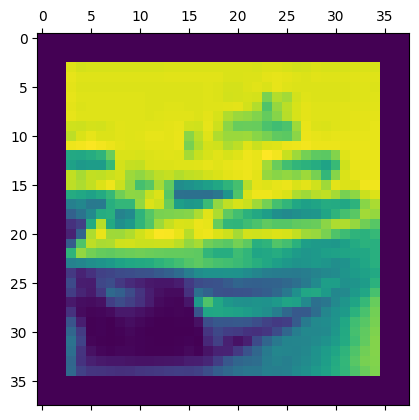

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')
plt.show()

In [16]:
layer_names=[layer.name for layer in res50_model.layers]
block1_layers = [layer for layer in layer_names if 'conv1' in layer]
print(block1_layers)

block2_layers = [layer for layer in layer_names if 'conv3' in layer]
print(block2_layers)

block3_layers = [layer for layer in layer_names if 'conv5' in layer]
print(block3_layers)


['conv1_pad', 'conv1_conv', 'conv1_bn', 'conv1_relu']
['conv3_block1_1_conv', 'conv3_block1_1_bn', 'conv3_block1_1_relu', 'conv3_block1_2_conv', 'conv3_block1_2_bn', 'conv3_block1_2_relu', 'conv3_block1_0_conv', 'conv3_block1_3_conv', 'conv3_block1_0_bn', 'conv3_block1_3_bn', 'conv3_block1_add', 'conv3_block1_out', 'conv3_block2_1_conv', 'conv3_block2_1_bn', 'conv3_block2_1_relu', 'conv3_block2_2_conv', 'conv3_block2_2_bn', 'conv3_block2_2_relu', 'conv3_block2_3_conv', 'conv3_block2_3_bn', 'conv3_block2_add', 'conv3_block2_out', 'conv3_block3_1_conv', 'conv3_block3_1_bn', 'conv3_block3_1_relu', 'conv3_block3_2_conv', 'conv3_block3_2_bn', 'conv3_block3_2_relu', 'conv3_block3_3_conv', 'conv3_block3_3_bn', 'conv3_block3_add', 'conv3_block3_out', 'conv3_block4_1_conv', 'conv3_block4_1_bn', 'conv3_block4_1_relu', 'conv3_block4_2_conv', 'conv3_block4_2_bn', 'conv3_block4_2_relu', 'conv3_block4_3_conv', 'conv3_block4_3_bn', 'conv3_block4_add', 'conv3_block4_out']
['conv5_block1_1_conv', 'conv

<ipython-input-23-244fa41cb891>:30: RuntimeWarning: invalid value encountered in divide

  channel_image /= channel_image.std()


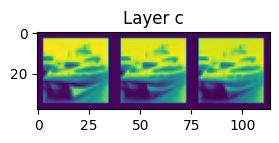

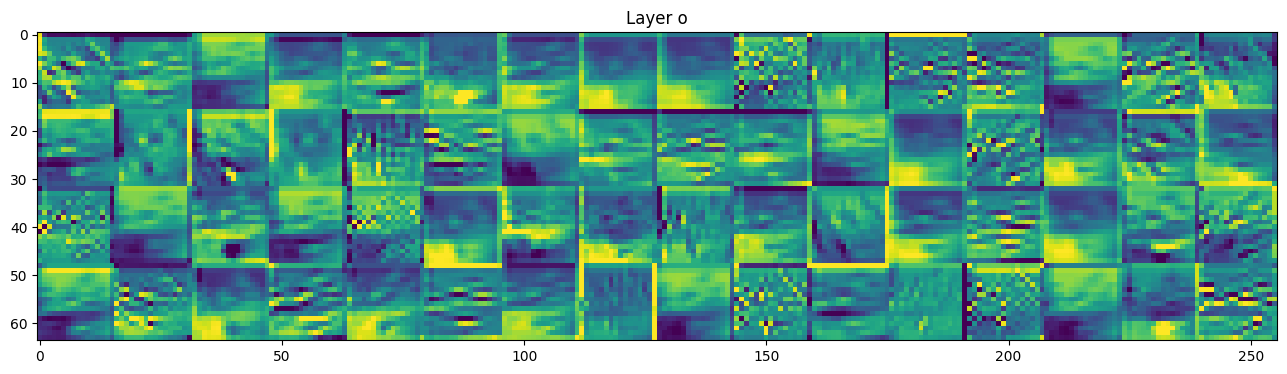

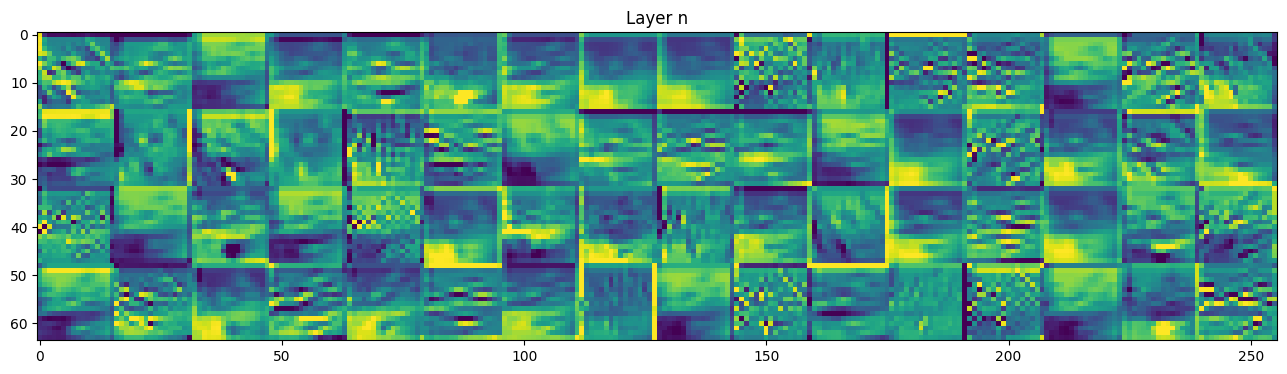

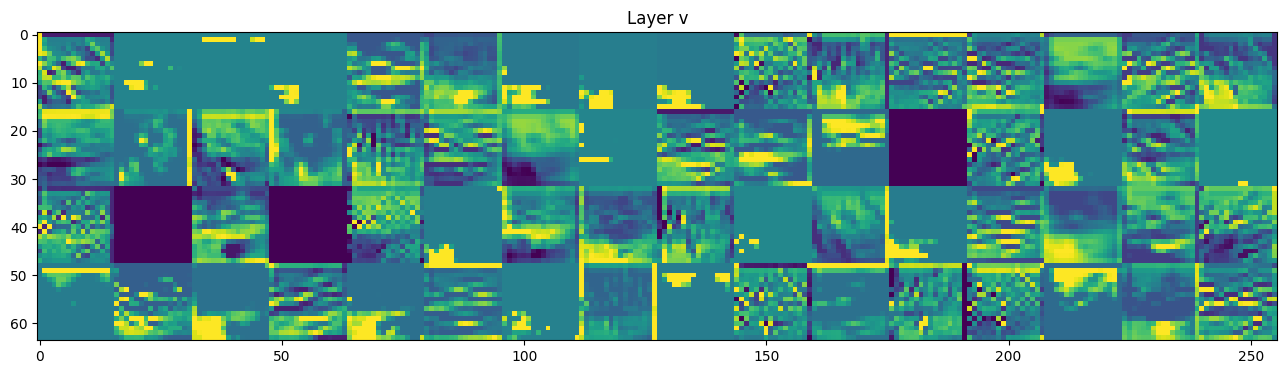

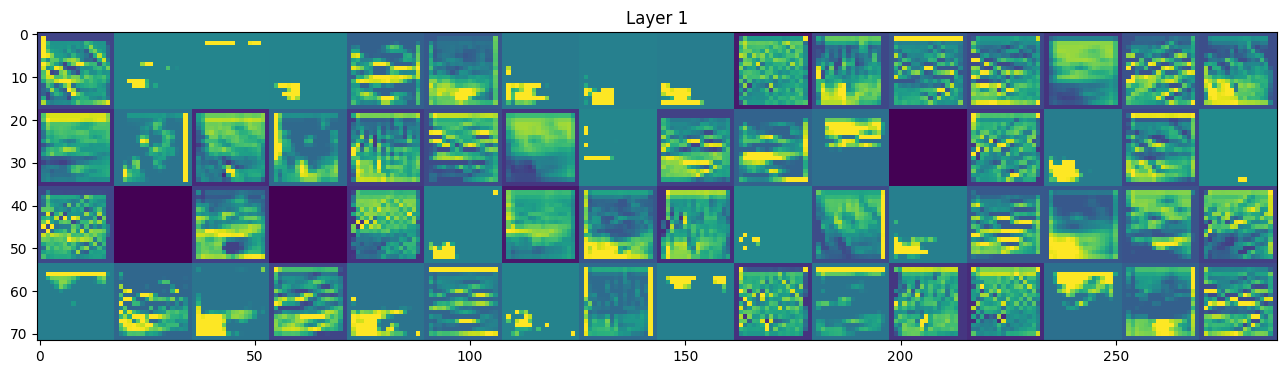

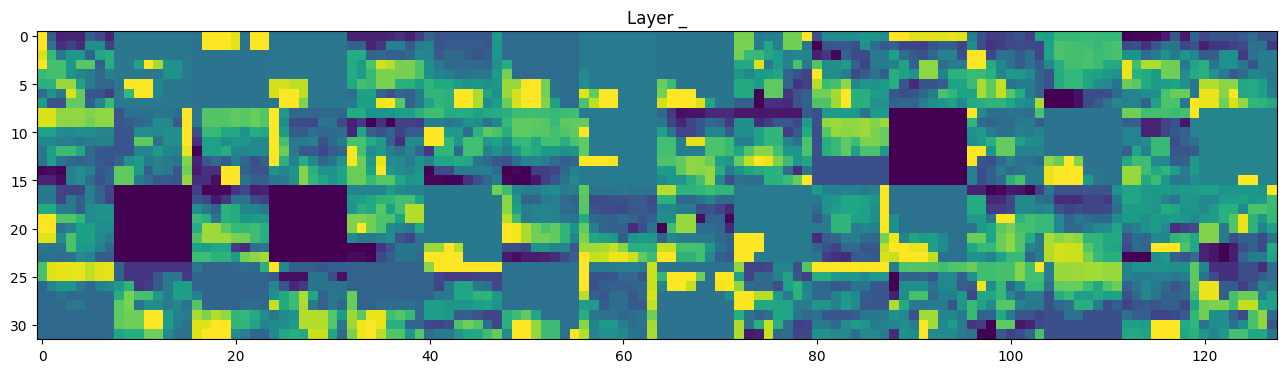

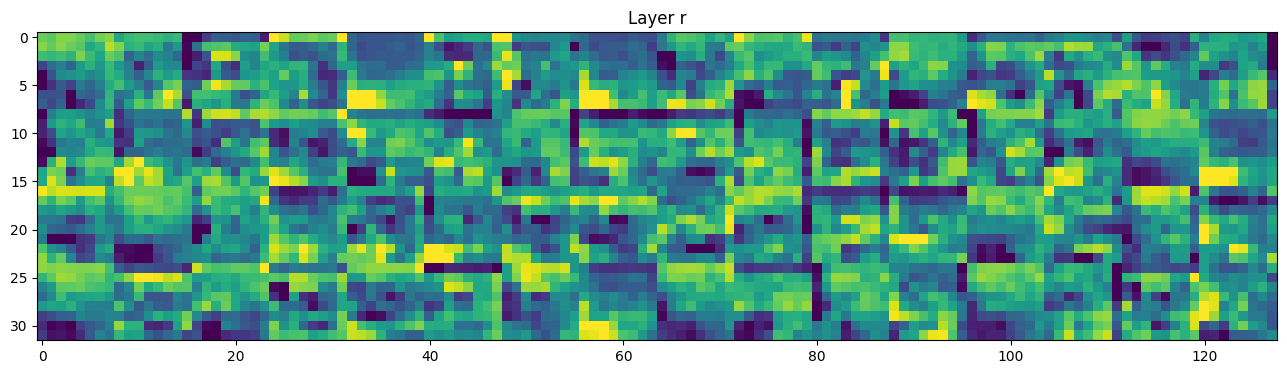

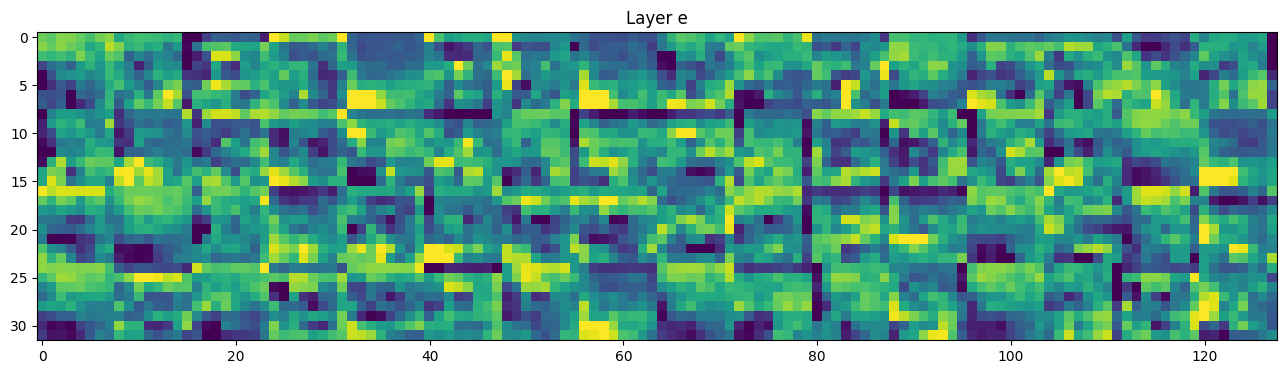

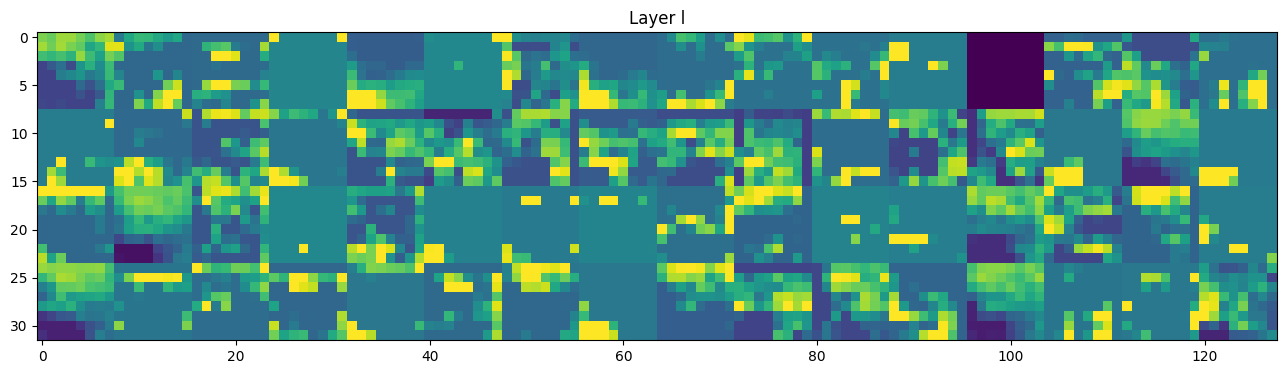

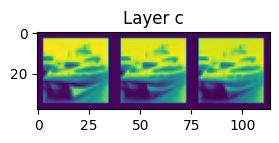

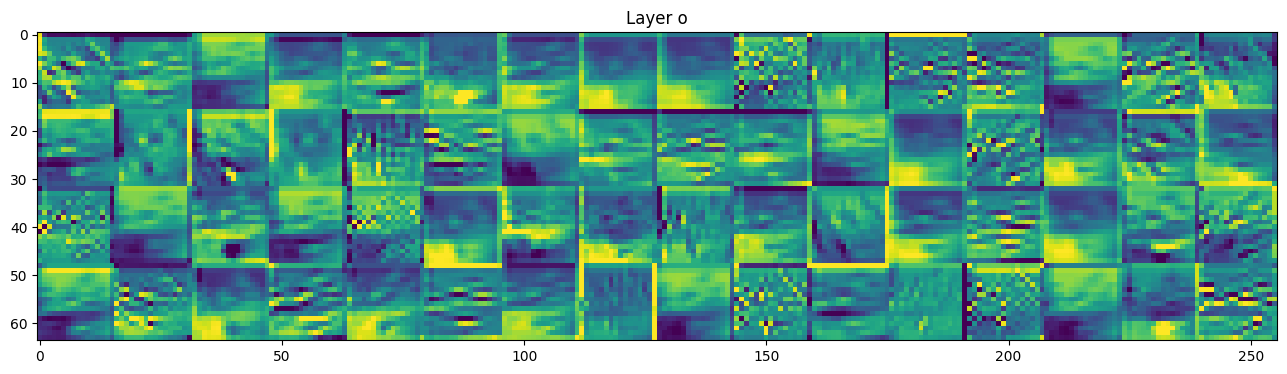

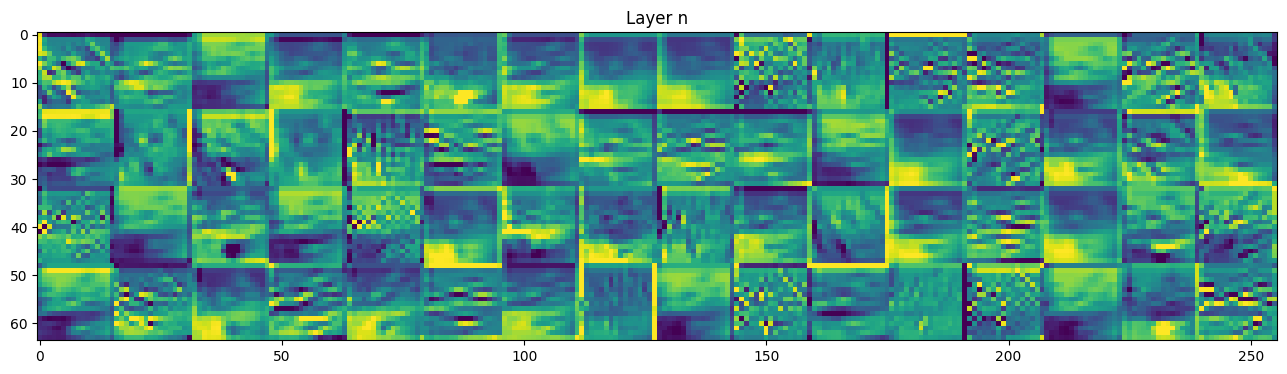

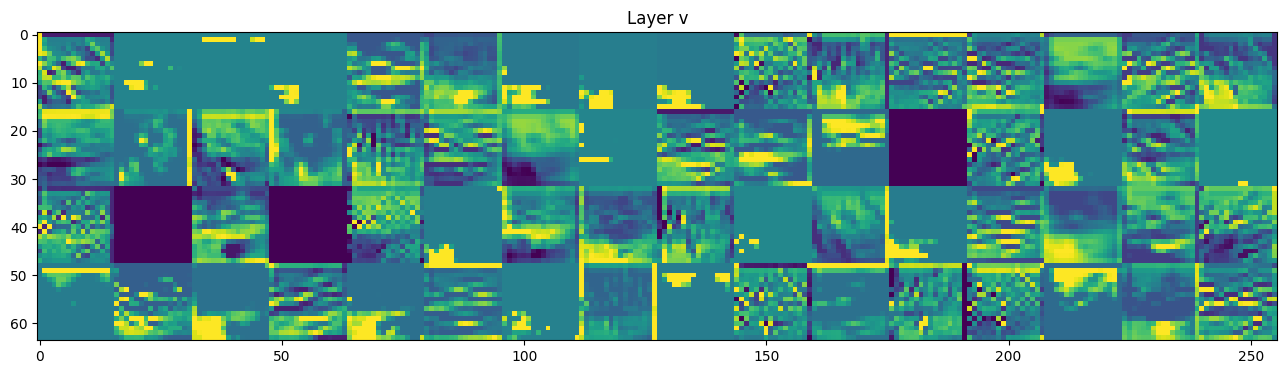

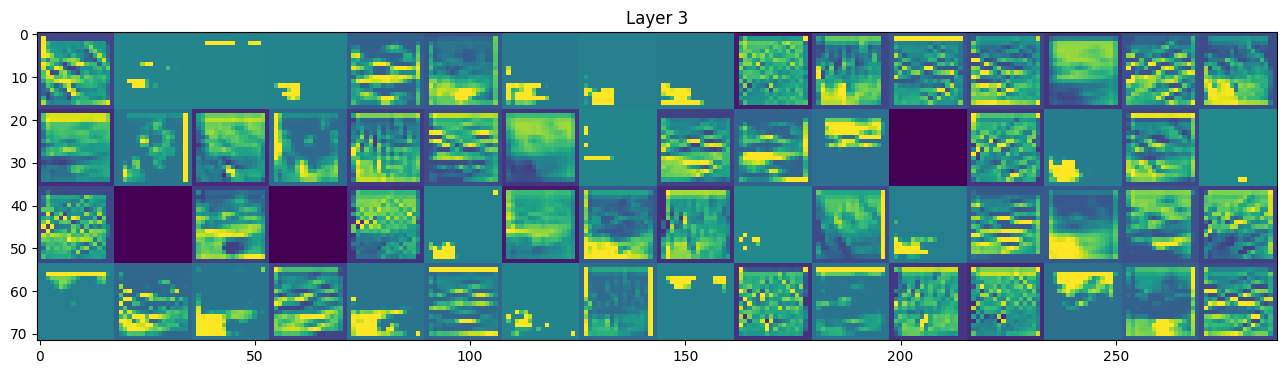

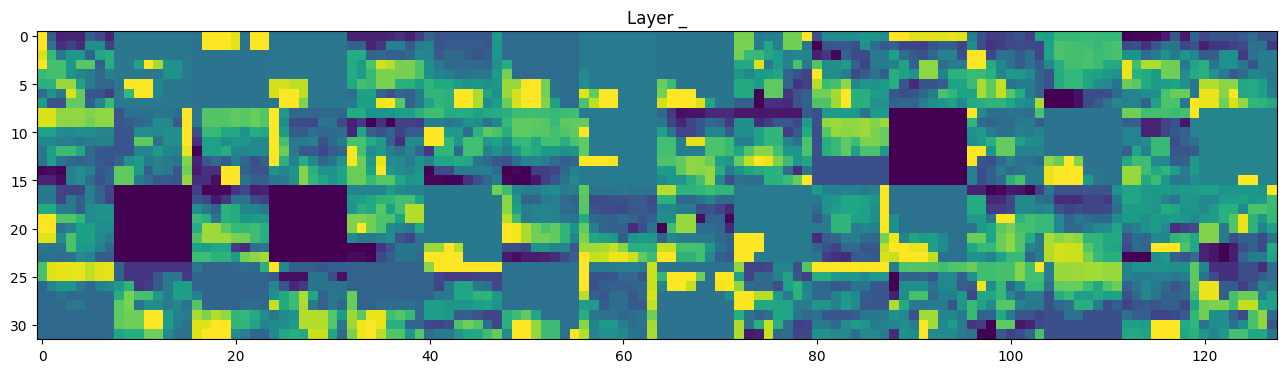

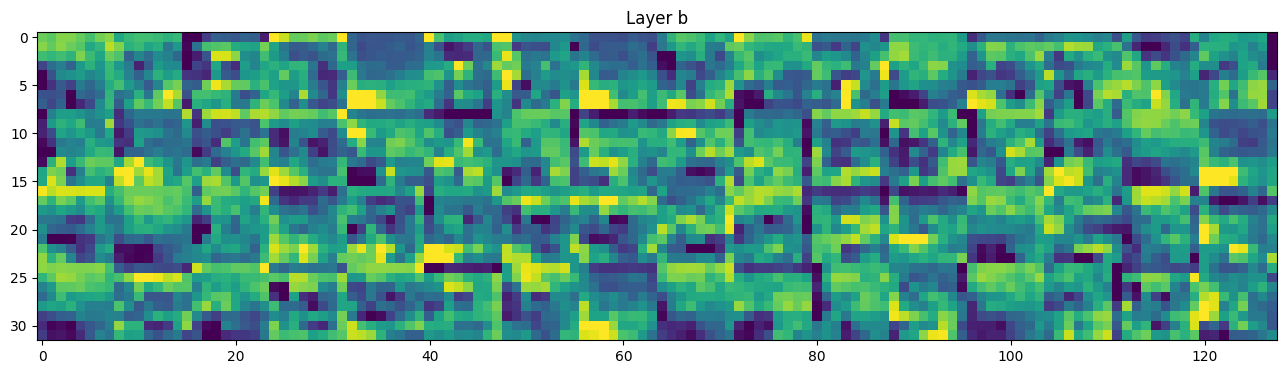

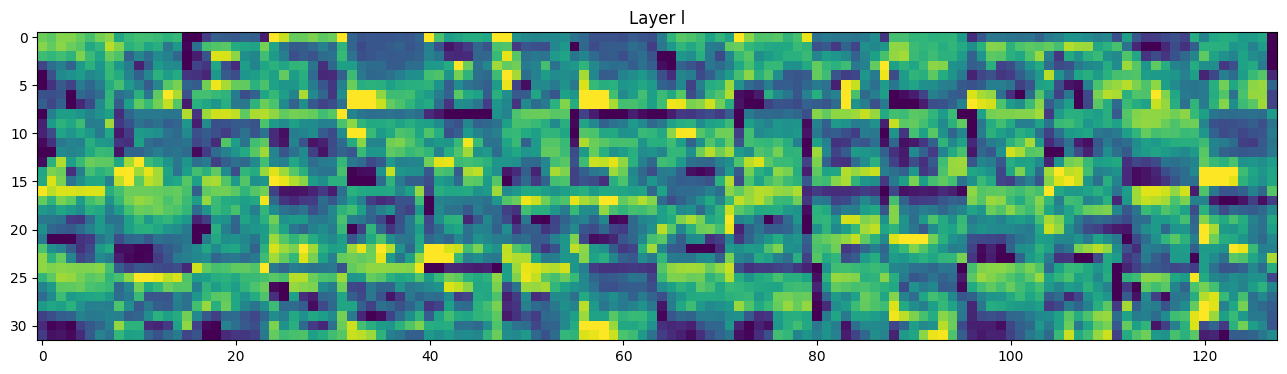

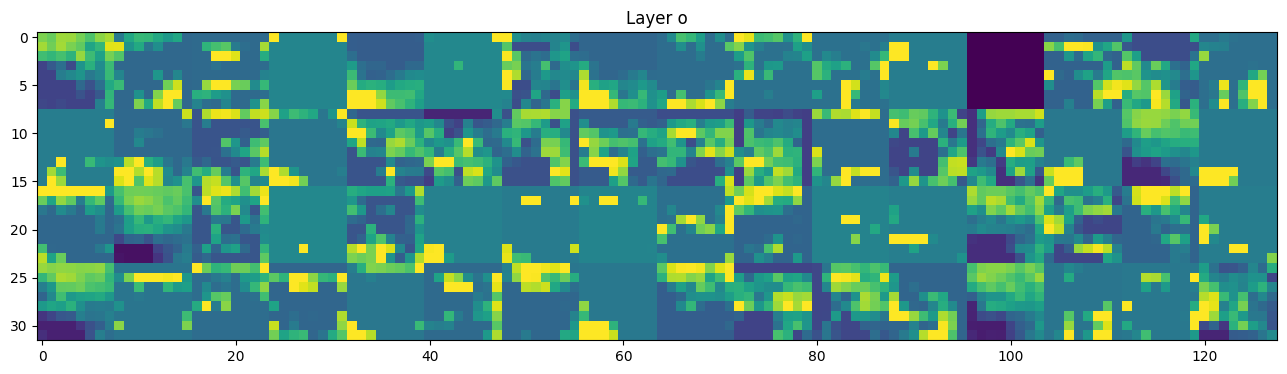

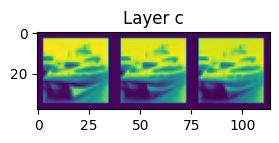

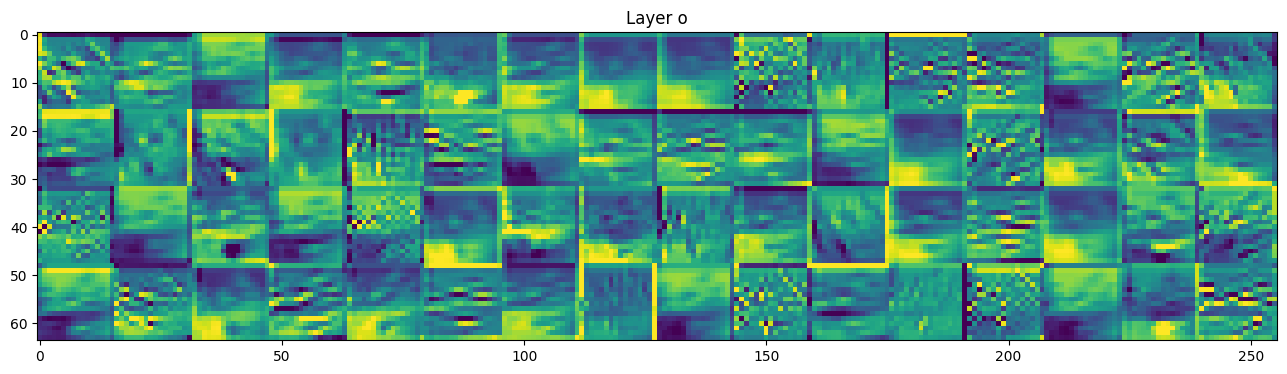

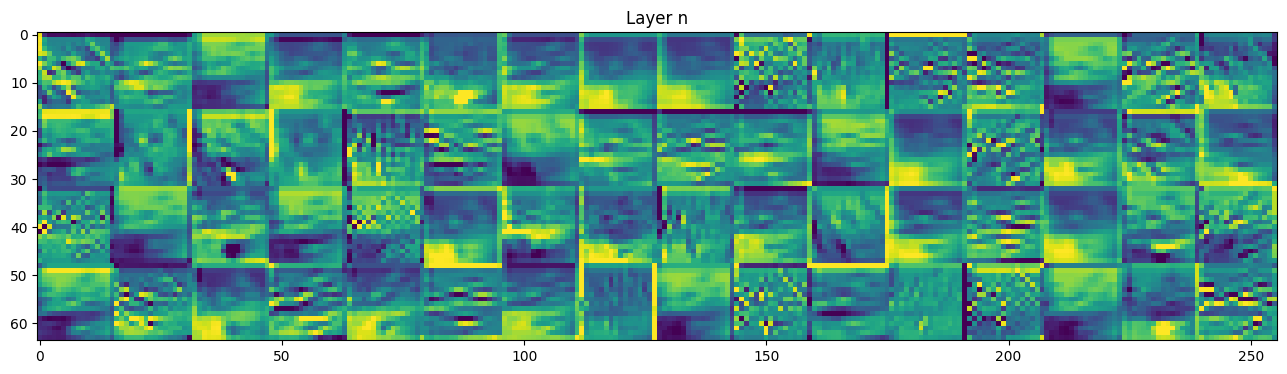

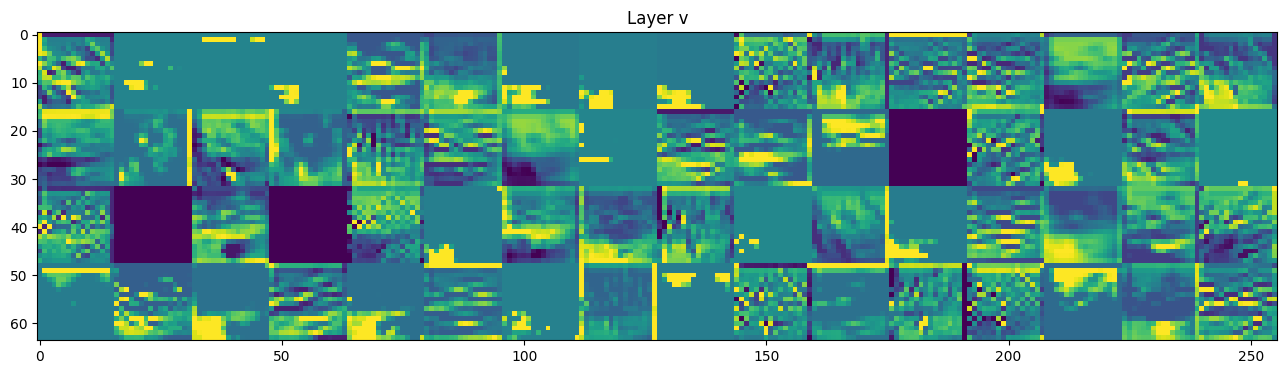

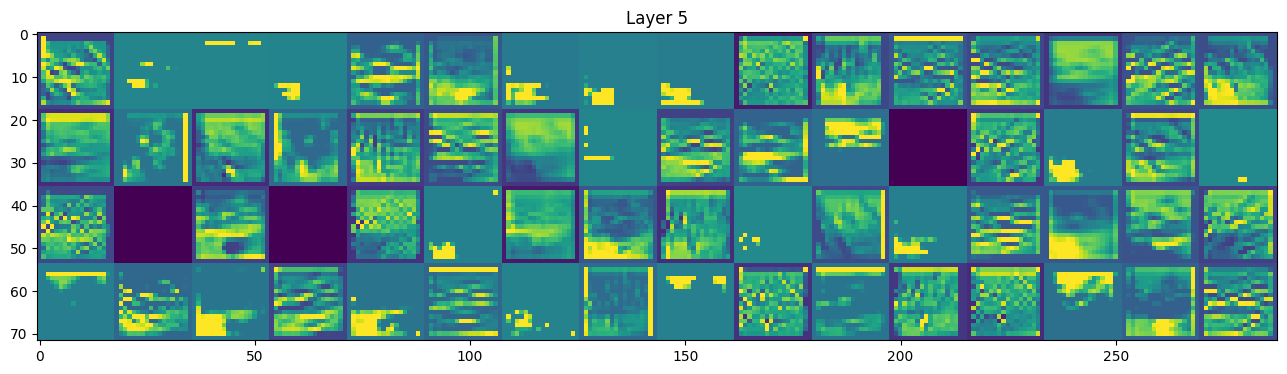

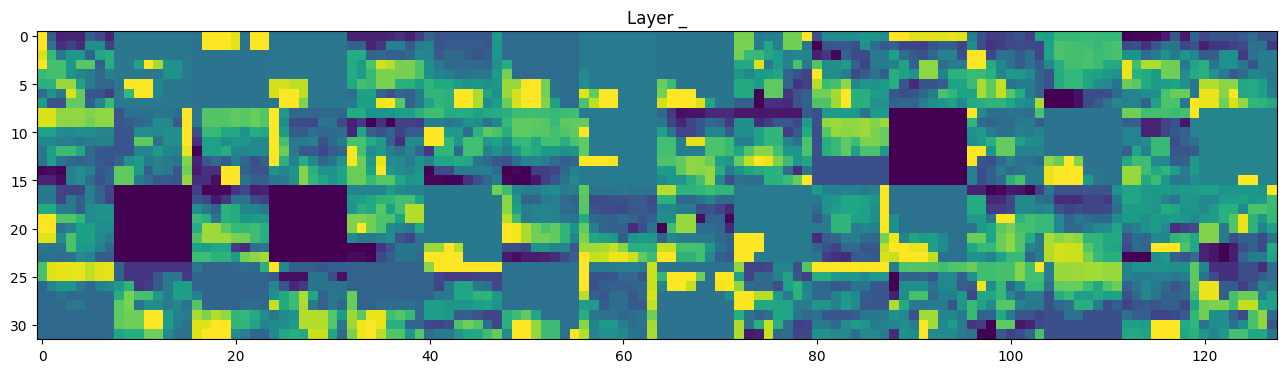

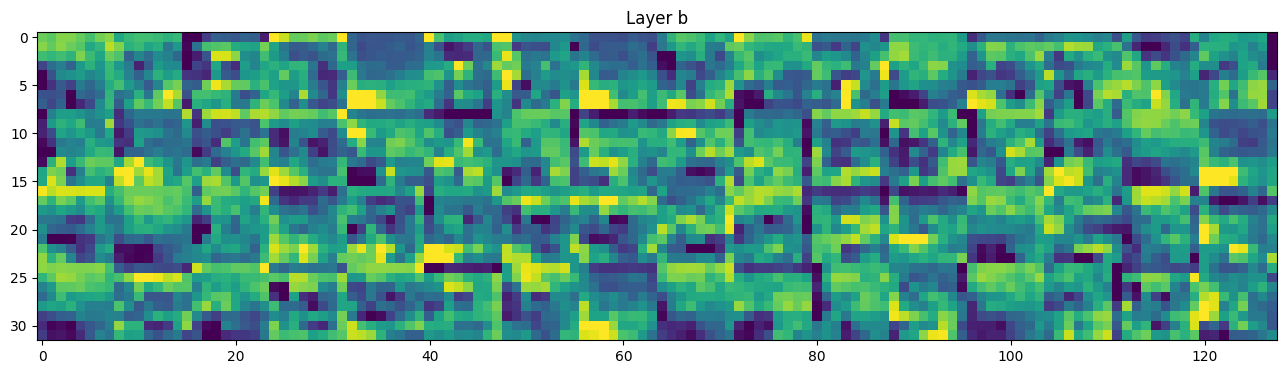

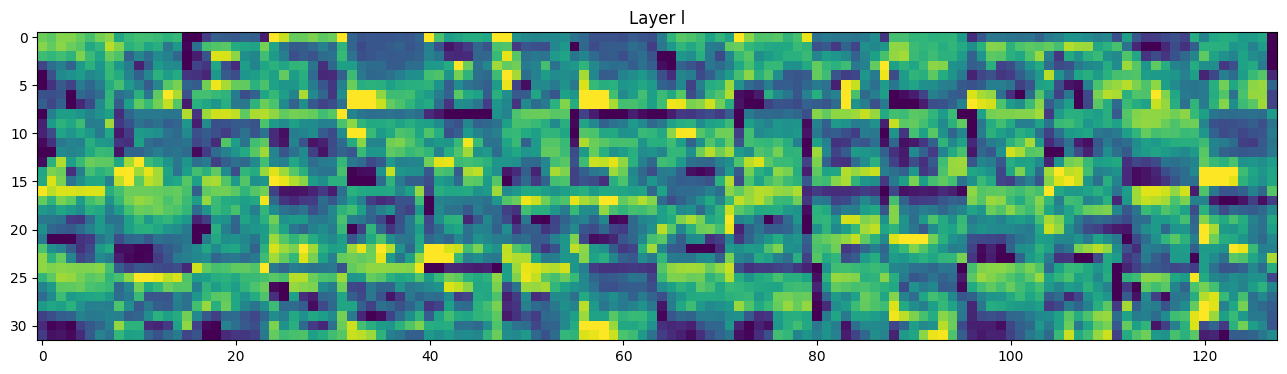

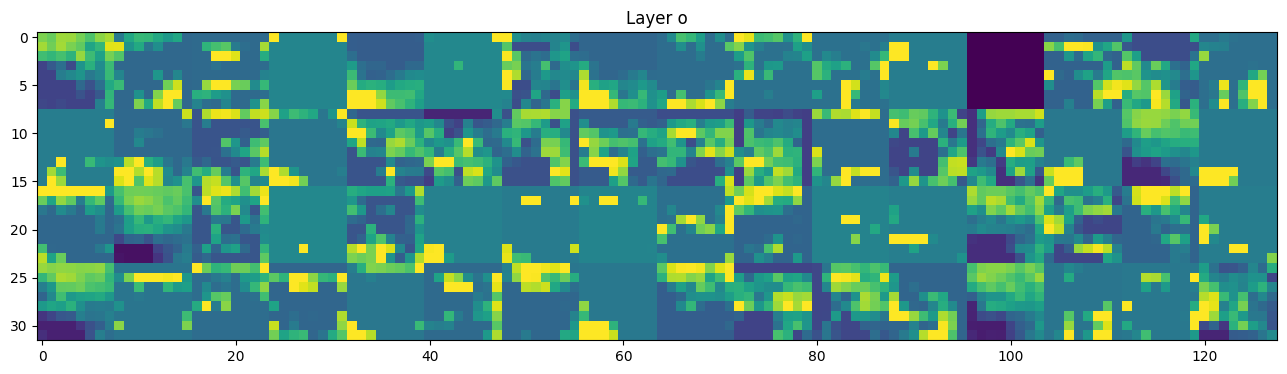

In [ ]:
# These are the names of the layers, so can have them as part of our plot
blocks = [block1_layers[-1], block2_layers[-1], block3_layers[-1]]
images_per_row = 16

# Now let's display our feature maps
for block in blocks:

  for layer_name, layer_activation in zip(block, activations):
      # This is the number of features in the feature map
      n_features = layer_activation.shape[-1]
      # The feature map has shape (1, size, size, n_features)
      size = layer_activation.shape[1]

      # We will tile the activation channels in this matrix
      if n_features < images_per_row:
        images_per_row = n_features
      else:
        images_per_row = 16
      n_cols = n_features // images_per_row
      display_grid = np.zeros((size * n_cols, images_per_row * size))

      # We'll tile each filter into this big horizontal grid
      for col in range(n_cols):
          for row in range(images_per_row):
              channel_image = layer_activation[0,
                                              :, :,
                                              col * images_per_row + row]
              # Post-process the feature to make it visually palatable
              channel_image -= channel_image.mean()
              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')
              display_grid[col * size : (col + 1) * size,
                          row * size : (row + 1) * size] = channel_image

      # Display the grid
      scale = 1. / size
      plt.figure(figsize=(scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
      plt.title("Layer {0}".format(layer_name))
      plt.grid(False)
      plt.imshow(display_grid, aspect='auto', cmap='viridis')

  plt.show()

## Visualizing covnet filters

In [30]:
from tensorflow.python.framework.ops import disable_eager_execution


In [31]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [32]:
def generate_pattern(layer_name, filter_index, size=64):
    disable_eager_execution()
    base_model = ResNet50(weights='imagenet', include_top=False)
    layer = base_model.get_layer(layer_name)
    input_img = base_model.input
    loss = K.mean(layer.output[:, :, :, filter_index])
    grads = K.gradients(loss, input_img)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # This function returns the loss and grads given the input picture
    iterate = K.function([input_img], [loss, grads])

    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

    img = input_img_data[0]
    return deprocess_image(img)

**Block 1 Filters**


Instructions for updating:

Colocations handled automatically by placer.


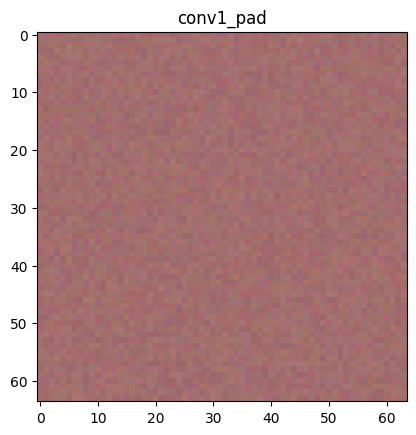

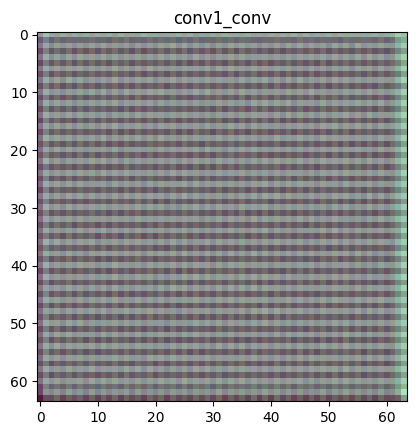

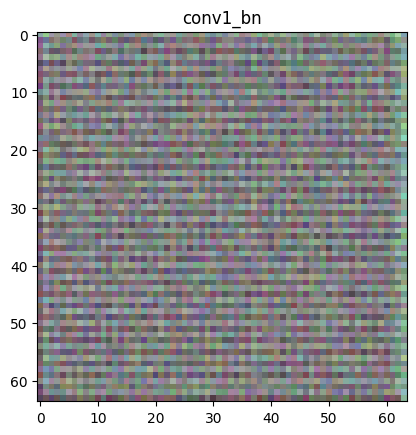

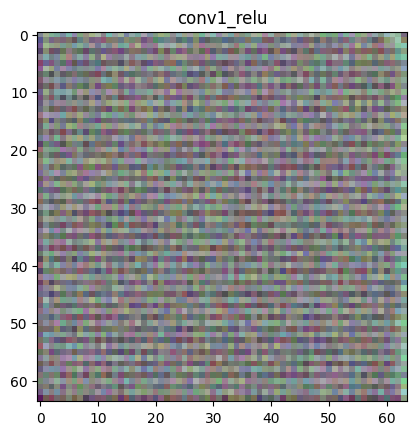

In [ ]:
for layer in block1_layers:
  plt.imshow(generate_pattern(layer, 0))
  plt.title(layer)
  plt.show()

**Middle Block Filters**

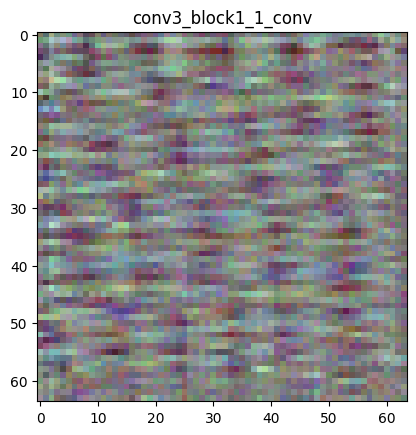

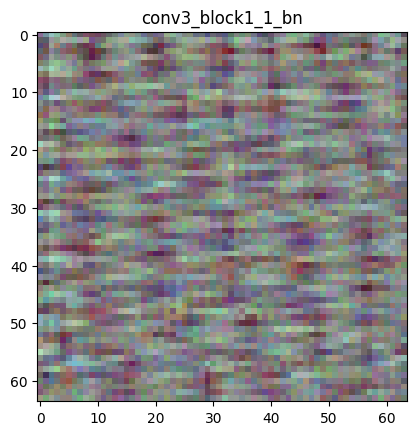

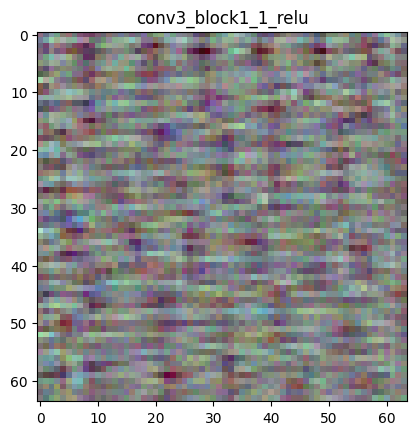

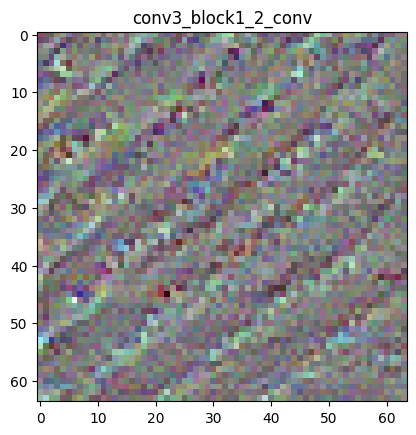

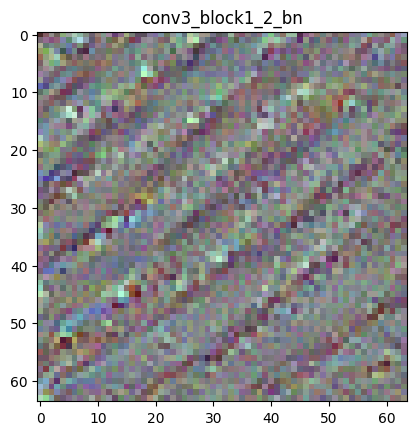

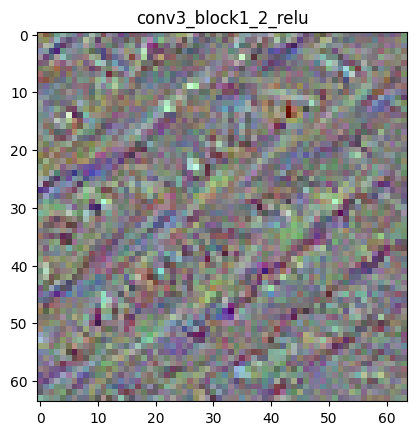

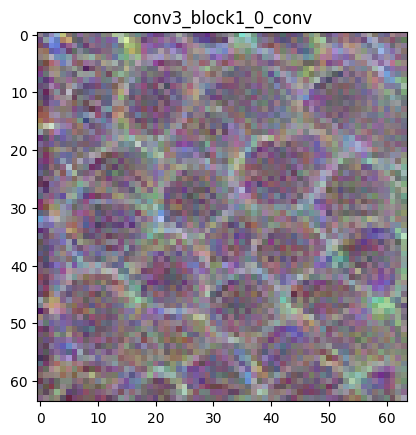

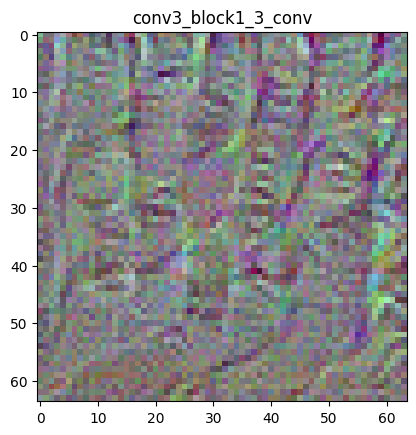

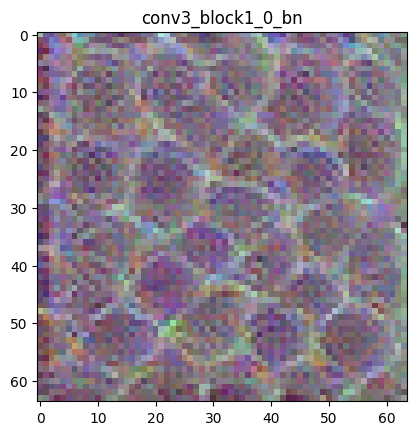

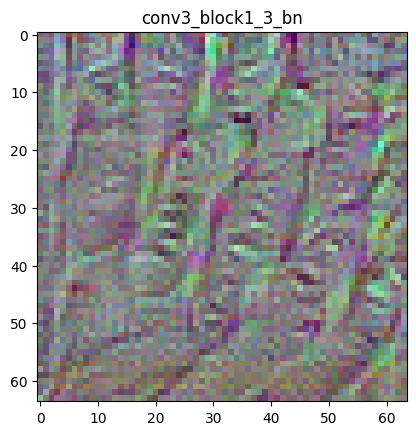

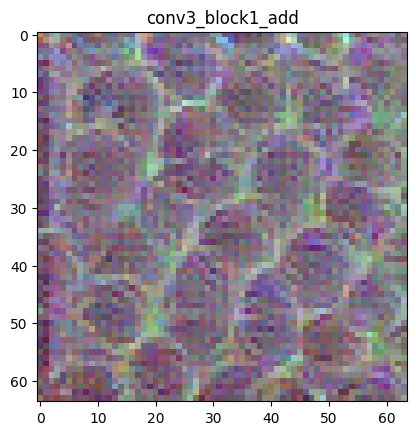

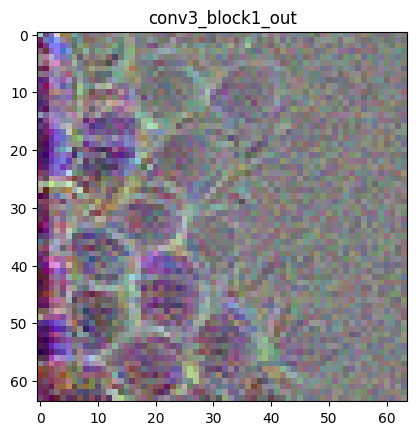

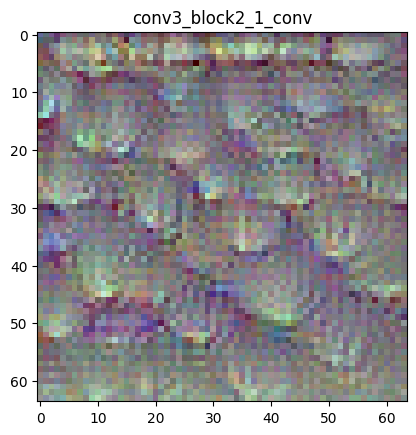

In [ ]:
for layer in block2_layers:
  plt.imshow(generate_pattern(layer, 0))
  plt.title(layer)
  plt.show()

**Final Block Filters**


Instructions for updating:

Colocations handled automatically by placer.


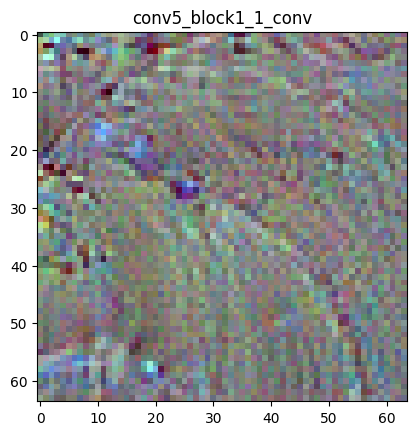

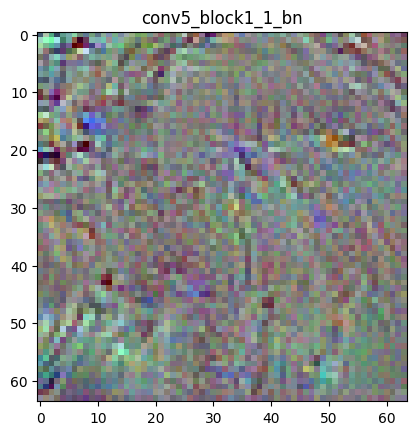

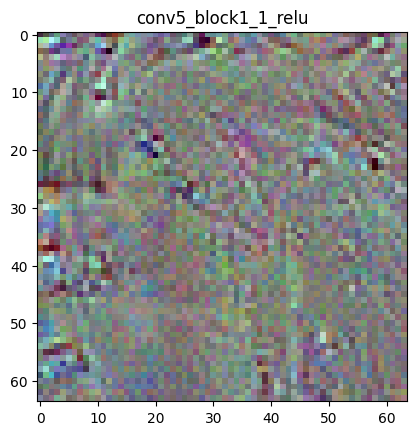

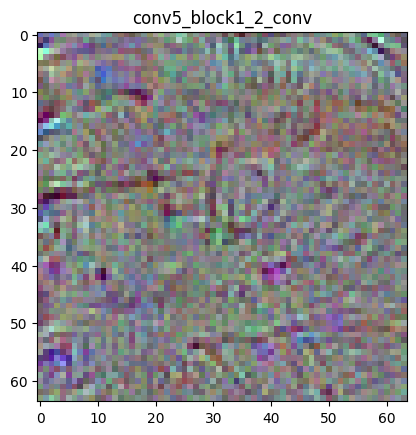

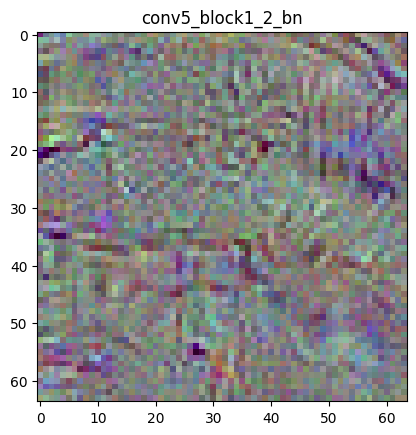

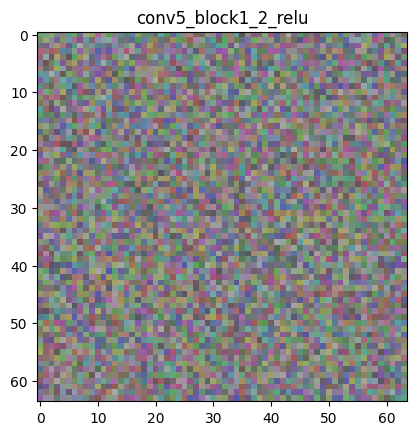

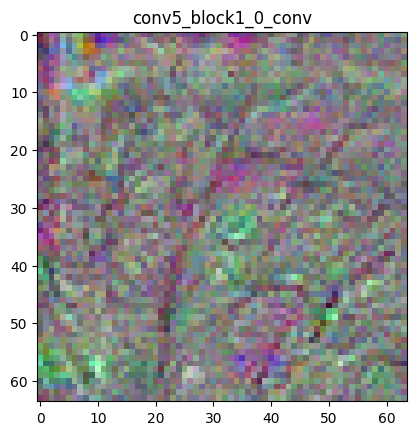

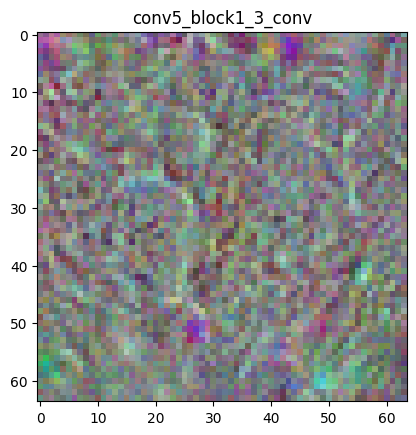

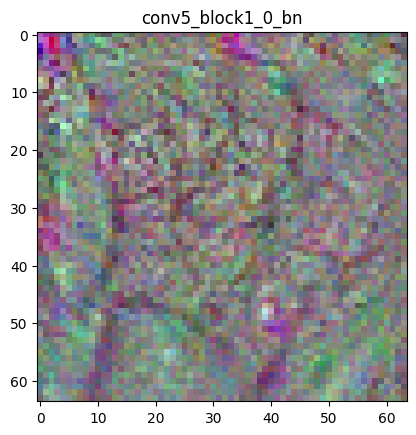

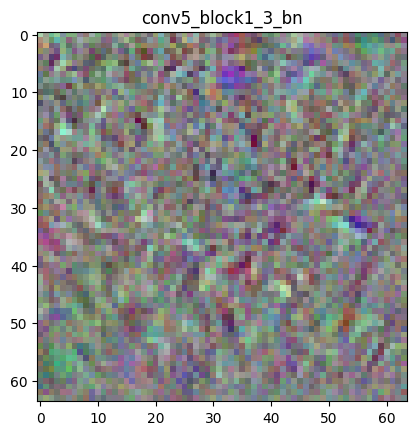

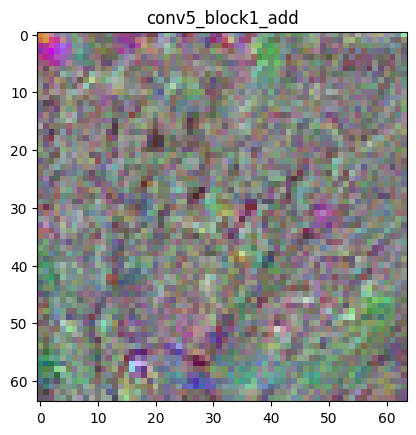

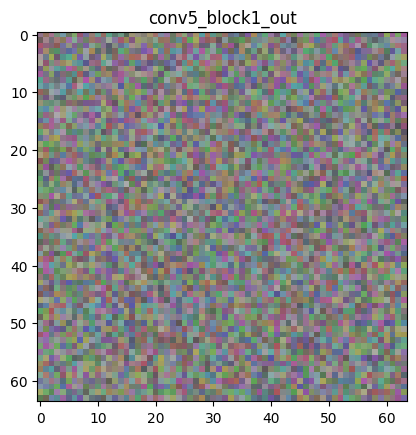

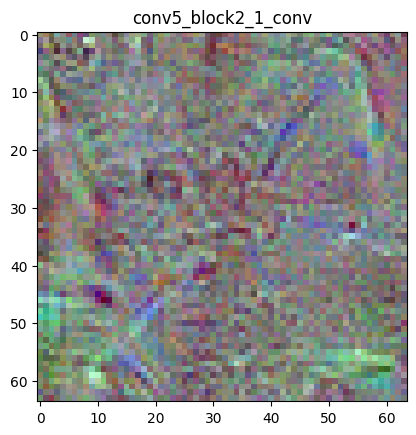

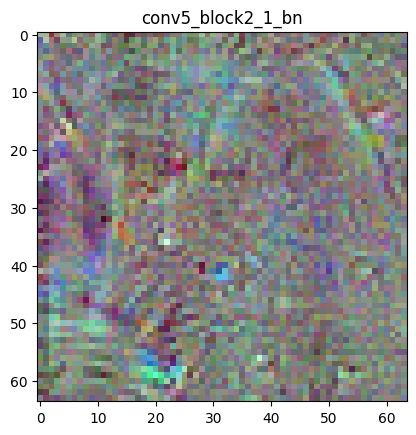

In [ ]:
for layer in block3_layers:
  plt.imshow(generate_pattern(layer, 0))
  plt.title(layer)
  plt.show()

**Visualising Convnet filters for First Block**

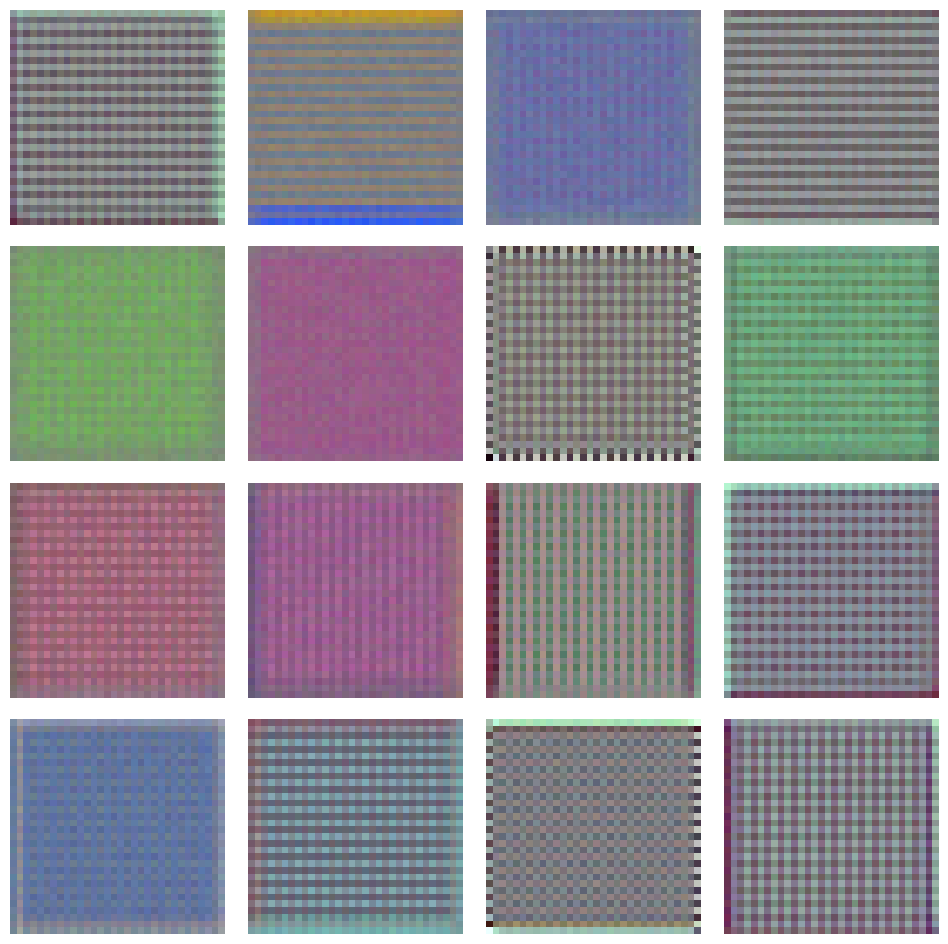

In [ ]:
layer_name = 'conv1_conv'

# Number of filters to visualize for the layer
num_filters = 16

# Create a figure for visualization
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

# Generate and visualize filter patterns
for i in range(4):
    for j in range(4):
        filter_idx = i + (j * 4)
        filter_pattern = generate_pattern(layer_name, filter_idx, size=32)  # Adjust the size to match CIFAR-10

        axs[i, j].imshow(filter_pattern / 255.0)
        axs[i, j].axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

**Visualising Convnet filters for Middle Block**

Instructions for updating:
Colocations handled automatically by placer.


94765736/94765736 [==============================] - 5s 0us/step


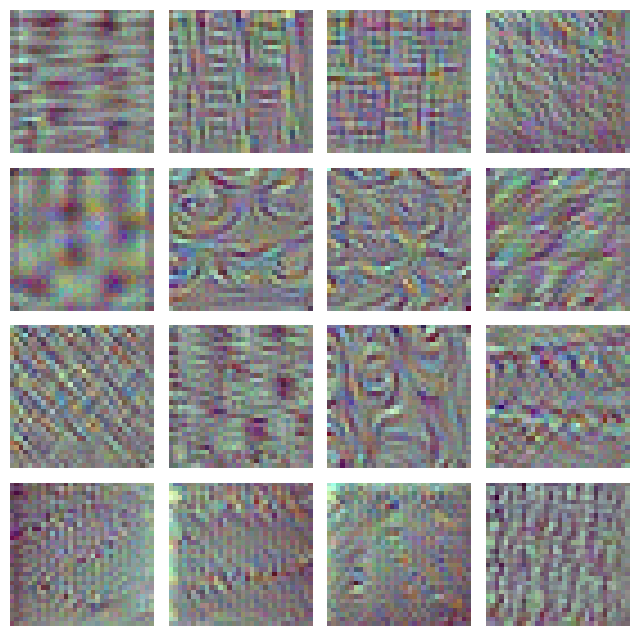

In [33]:
layer_name = 'conv3_block1_1_conv'

# Number of filters to visualize for the layer
num_filters = 16

# Create a figure for visualization
fig, axs = plt.subplots(4, 4, figsize=(8, 8))

# Generate and visualize filter patterns
for i in range(4):
    for j in range(4):
        filter_idx = i + (j * 4)
        filter_pattern = generate_pattern(layer_name, filter_idx, size=32)  # Adjust the size to match CIFAR-10

        axs[i, j].imshow(filter_pattern / 255.0)
        axs[i, j].axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

**Visualising Convnet filters for F Block**

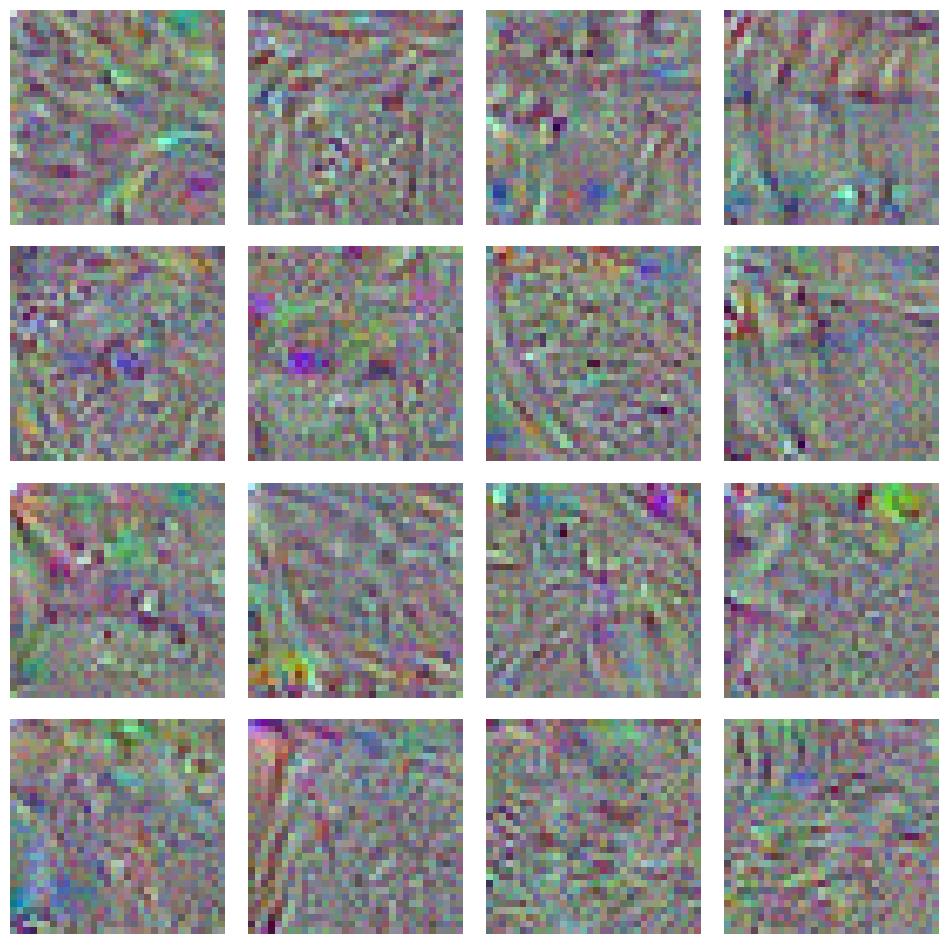

In [ ]:
layer_name = 'conv5_block1_3_conv'

# Number of filters to visualize for the layer
num_filters = 16

# Create a figure for visualization
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

# Generate and visualize filter patterns
for i in range(4):
    for j in range(4):
        filter_idx = i + (j * 4)
        filter_pattern = generate_pattern(layer_name, filter_idx, size=32)  # Adjust the size to match CIFAR-10

        axs[i, j].imshow(filter_pattern / 255.0)
        axs[i, j].axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

## Visualizing heatmaps of class activation

In [17]:
# `img` is a PIL image of size 224x224
from PIL import Image

# Read image
# img = Image.open('dog.jpg')
# size =(32,32)
# img = img.resize(size)

img = x_test[1]
img = tf.keras.utils.img_to_array(img)
img = img/ 255.0
img =  np.expand_dims(img, axis=0)
img = preprocess_input(img)
print(img.shape)


(1, 32, 32, 3)


In [18]:
predictions = res50_model.predict(img)

1/1 [==============================] - 0s 24ms/step


In [19]:
print(np.argmax(predictions[0]))

0


In [20]:
def custom_decode_predictions(predictions, top=5, class_names=None):
    if class_names is None:
        class_names = [str(i) for i in range(predictions.shape[-1])]

    results = []
    for pred in predictions:
        top_indices = pred.argsort()[-top:][::-1]
        decoded_preds = [(class_names[i], pred[i]) for i in top_indices]
        results.append(decoded_preds)

    return results

In [21]:
decoded_predictions = custom_decode_predictions(predictions, top=5, class_names=None)

In [22]:
for i, preds in enumerate(decoded_predictions):
    print(f"Top predictions for image {i}:")
    for label, confidence in preds:
        print(f"{label}: {confidence:.4f}")

Top predictions for image 0:
0: 0.0000


In [32]:
layer_names=[layer.name for layer in res50_model.layers]
conv_layers = [layer for layer in layer_names if 'conv' in layer]
print(conv_layers)

['conv1_pad', 'conv1_conv', 'conv1_bn', 'conv1_relu', 'conv2_block1_1_conv', 'conv2_block1_1_bn', 'conv2_block1_1_relu', 'conv2_block1_2_conv', 'conv2_block1_2_bn', 'conv2_block1_2_relu', 'conv2_block1_0_conv', 'conv2_block1_3_conv', 'conv2_block1_0_bn', 'conv2_block1_3_bn', 'conv2_block1_add', 'conv2_block1_out', 'conv2_block2_1_conv', 'conv2_block2_1_bn', 'conv2_block2_1_relu', 'conv2_block2_2_conv', 'conv2_block2_2_bn', 'conv2_block2_2_relu', 'conv2_block2_3_conv', 'conv2_block2_3_bn', 'conv2_block2_add', 'conv2_block2_out', 'conv2_block3_1_conv', 'conv2_block3_1_bn', 'conv2_block3_1_relu', 'conv2_block3_2_conv', 'conv2_block3_2_bn', 'conv2_block3_2_relu', 'conv2_block3_3_conv', 'conv2_block3_3_bn', 'conv2_block3_add', 'conv2_block3_out', 'conv3_block1_1_conv', 'conv3_block1_1_bn', 'conv3_block1_1_relu', 'conv3_block1_2_conv', 'conv3_block1_2_bn', 'conv3_block1_2_relu', 'conv3_block1_0_conv', 'conv3_block1_3_conv', 'conv3_block1_0_bn', 'conv3_block1_3_bn', 'conv3_block1_add', 'conv3

In [ ]:
tf.compat.v1.disable_eager_execution()

In [23]:
import random

def generate_cam(model, image, layer_name):
    # Select a random image from X_test
    img_path = image
    # print(img_path)
    # Preprocess the image
    img_path = img_path/255.0
    x = np.expand_dims(img_path, axis=0)
    x = preprocess_input(x)

    last_conv_layer = model.get_layer(layer_name)
    model_grad = Model(inputs=model.inputs, outputs=(last_conv_layer.output, model.output))

    with tf.GradientTape() as tape:
        conv_outputs, predictions = model_grad(x)
        class_idx = tf.argmax(predictions[0])
        loss = conv_outputs[0, 0, 0, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    heatmap = tf.maximum(heatmap, 0)
    heatmap /= tf.reduce_max(heatmap)


    return heatmap[0].numpy(), class_idx.numpy()


In [24]:
import cv2
def create_superimposed_img(image, layer_name):
  heatmap, predicted_class = generate_cam(res50_model, image, layer_name)

  plt.matshow(heatmap)
  plt.title(f'Heatmap for Predicted Class: {predicted_class}')
  plt.show()
  # We use cv2 to load the original image
  tst_img = image
  img =cv2.cvtColor(tst_img, cv2.COLOR_RGB2BGR)

  # We resize the heatmap to have the same size as the original image
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  # We convert the heatmap to RGB
  heatmap = np.uint8(255 * heatmap)

  # We apply the heatmap to the original image
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  # 0.4 here is a heatmap intensity factor
  superimposed_img = heatmap * 0.4 + img
  return superimposed_img
  # # Save the image to disk
  # cv2.imwrite('predicted_cam.jpg', superimposed_img)



**Block 1 CAM**

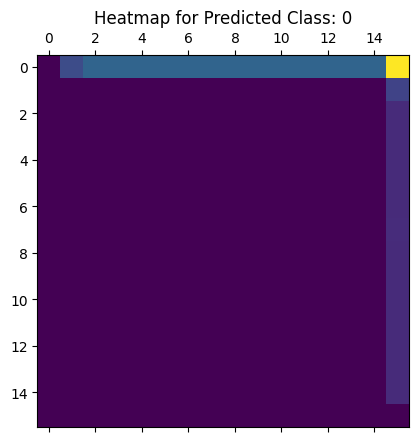

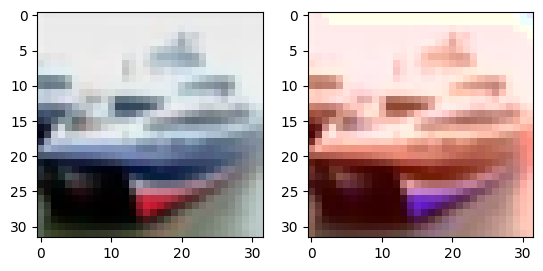

In [25]:
from PIL import Image
img = x_test[1]

superimposed_img = create_superimposed_img(img, block1_layers[-1])
superimposed_img = superimposed_img / 255.0

# Display the superimposed image using matplotlib
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(superimposed_img)
plt.show()


**Middle Block CAM**

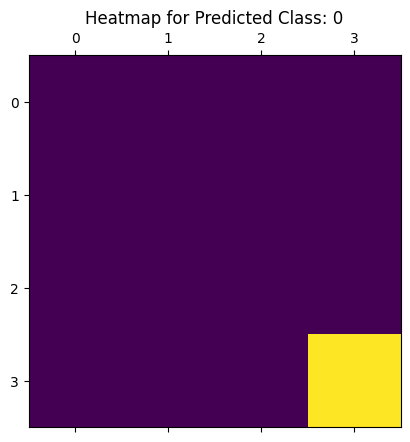

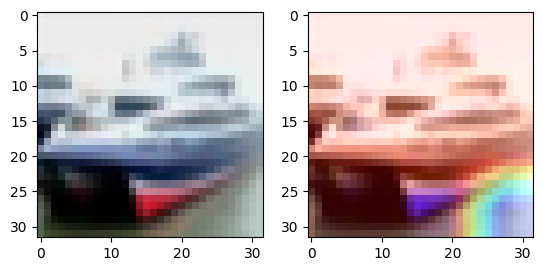

In [30]:
from PIL import Image
img = x_test[1]

superimposed_img = create_superimposed_img(img, block2_layers[-1])
superimposed_img = superimposed_img / 255.0

# Display the superimposed image using matplotlib
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(superimposed_img)
plt.show()


**Final Block CAM**

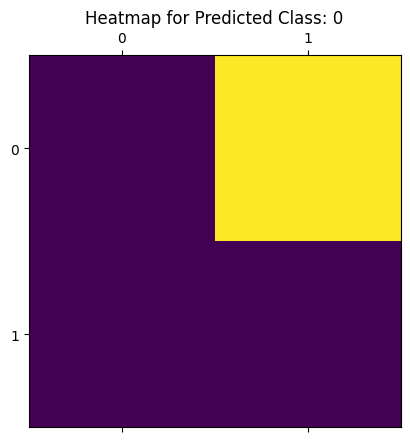

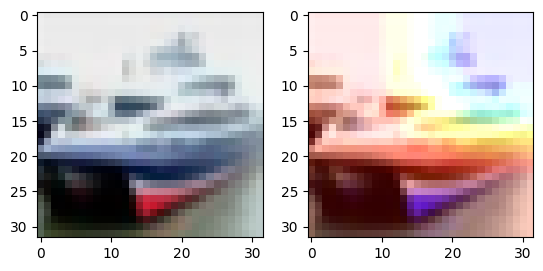

In [37]:
from PIL import Image
img = x_test[1]

superimposed_img = create_superimposed_img(img, conv_layers[92])
superimposed_img = superimposed_img / 255.0

# Display the superimposed image using matplotlib
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(superimposed_img)
plt.show()
